In [ ]:
# Quantum Random Walk Algorithm

This Jupyter notebook explains the quantum random walk algorithm using the provided code. The algorithm is implemented using the Classiq library.

## Introduction

A quantum random walk is a quantum analog of a classical random walk. It leverages quantum superposition and entanglement to explore multiple paths simultaneously, offering potential speedups for various computational problems.


In [ ]:
### Importing Libraries

First, we import the necessary libraries from Classiq.

In [ ]:
from classiq import *
from classiq.qmod.symbolic import logical_or
from classiq.execution import ExecutionPreferences

In [ ]:
## Parameters
We define the number of qubits required to represent the vertices and the total number of nodes.

In [ ]:
# Number of qubits to represent the vertices (log2 of 16 nodes)
size = 4
num_nodes = 2**size # Total number of nodes (16 nodes)

In [ ]:
## Prepare Minus State
The prepare_minus function prepares a qubit in the |-> state.

In [ ]:
@qfunc
def prepare_minus(x: QBit):
    """
    Prepares a qubit in the |-> state.
    
    Args:
        x (QBit): The qubit to prepare.
    """
    X(x)
    H(x)

In [ ]:
## Coin Operator
The C_operator function applies the coin operator to all vertices.

In [ ]:
@qfunc
def C_operator(vertices:QNum, adjacent_vertices: QNum):
    """
    Applies the coin operator to all vertices.
    
    Args:
        vertices (QNum): QNum representing the vertices.
        adjacent_vertices (QNum): QNum representing the adjacent vertices.
    """
    for i in range(num_nodes):
        C_iteration(i,vertices,adjacent_vertices)

In [ ]:
## Shift Operator
The S_operator function applies the shift operator to swap vertices with their adjacent vertices.

In [ ]:
@qfunc 
def S_operator(vertices:QNum, adjacent_vertices: QNum):
    """
    Applies the shift operator to swap vertices with their adjacent vertices.
    
    Args:
        vertices (QNum): QNum representing the vertices.
        adjacent_vertices (QNum): QNum representing the adjacent vertices.
    """
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))  

In [ ]:
## Main Function
The main function performs the quantum random walk.

In [ ]:
@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):
    """
    Main function to perform the quantum random walk.
    
    Args:
        vertices (Output[QNum]): Output QNum to represent vertices.
        adjacent_vertices (Output[QNum]): Output QNum to represent adjacent vertices.
    """
    allocate(size, vertices)  # Allocate qubits for vertices
    hadamard_transform(vertices)  # Apply Hadamard transform to initialize superposition
    allocate(size, adjacent_vertices)  # Allocate qubits for adjacent vertices
    
    C_operator(vertices, adjacent_vertices)  # Apply coin operator
    S_operator(vertices, adjacent_vertices)  # Apply shift operator


In [ ]:
## Creating and Synthesizing the Quantum Model
Finally, we create and synthesize the quantum model.

In [ ]:
# Create and synthesize the quantum model
qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

In [ ]:
Node=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
Node=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
Node=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
Node=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
Node=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
Node=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
Node=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
Node=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0]
Node=14, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5]
Node=15, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0]

In [ ]:
Opening: https://platform.classiq.io/circuit/cccef5a7-c2e5-4aa7-874d-76565b086f12?version=0.42.2

In [ ]:
## Figures and Diagrams
Quantum Circuit Diagram
Below is a diagram of the quantum circuit used in the algorithm.

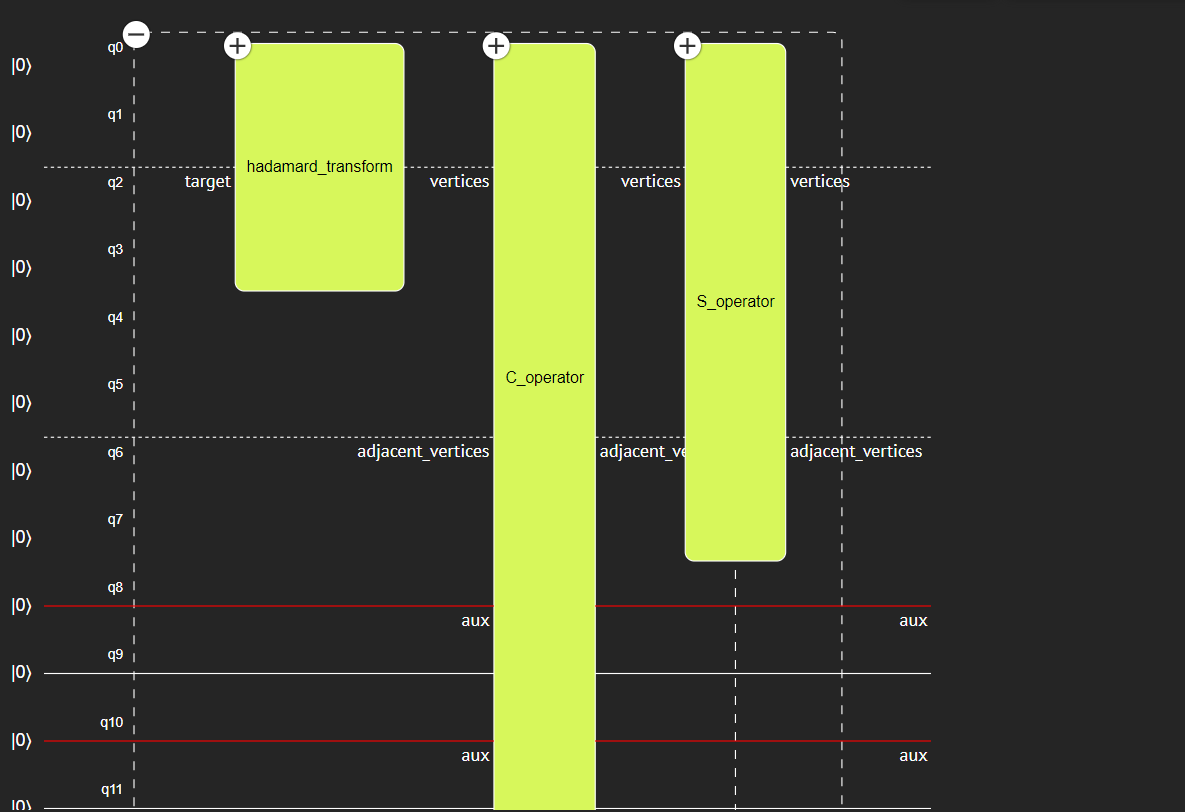

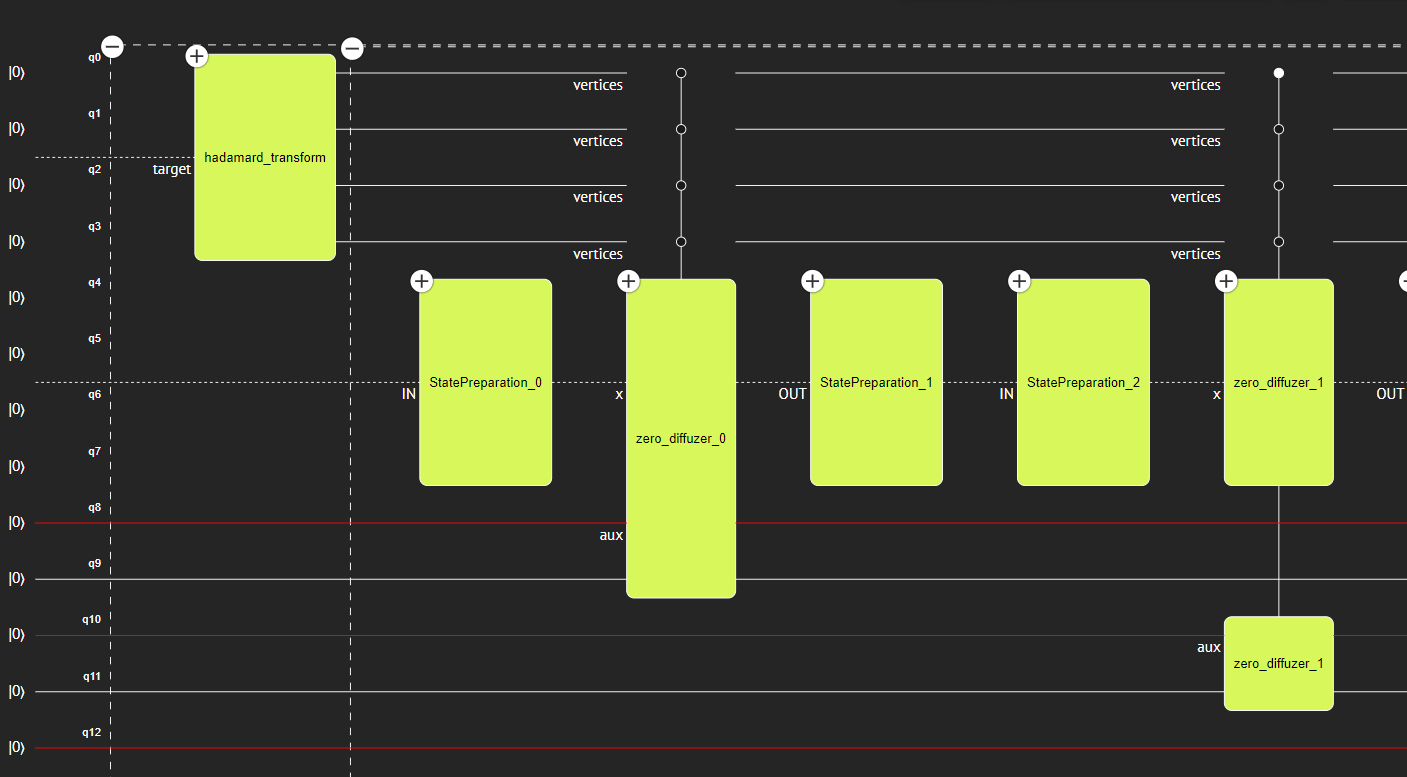

In [ ]:
## State Evolution
The following figure shows the evolution of the quantum state during the random walk.

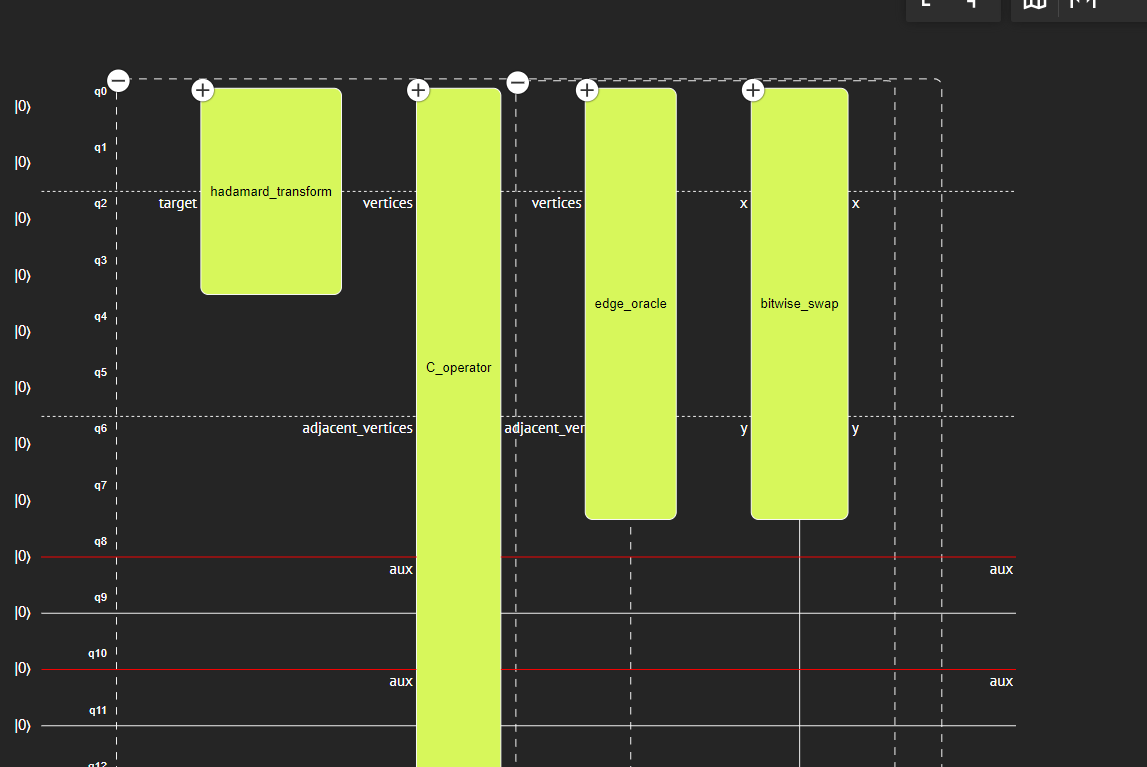

In [ ]:
Below is the full final code:

In [69]:
from classiq import *
from classiq.qmod.symbolic import logical_or
from classiq.execution import ExecutionPreferences

# Number of qubits to represent the vertices (log2 of 16 nodes)
size = 4
num_nodes = 2**size # Total number of nodes (16 nodes)

@qfunc
def prepare_minus(x: QBit):
    """
    Prepares a qubit in the |-> state.
    
    Args:
        x (QBit): The qubit to prepare.
    """
    X(x)
    H(x)

@qfunc
def C_operator(vertices:QNum, adjacent_vertices: QNum):
    """
    Applies the coin operator to all vertices.
    
    Args:
        vertices (QNum): QNum representing the vertices.
        adjacent_vertices (QNum): QNum representing the adjacent vertices.
    """
    for i in range(num_nodes):
        C_iteration(i,vertices,adjacent_vertices)

@qfunc 
def S_operator(vertices:QNum, adjacent_vertices: QNum):
    """
    Applies the shift operator to swap vertices with their adjacent vertices.
    
    Args:
        vertices (QNum): QNum representing the vertices.
        adjacent_vertices (QNum): QNum representing the adjacent vertices.
    """
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))  

@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):
    """
    Main function to perform the quantum random walk.
    
    Args:
        vertices (Output[QNum]): Output QNum to represent vertices.
        adjacent_vertices (Output[QNum]): Output QNum to represent adjacent vertices.
    """
    allocate(size, vertices)  # Allocate qubits for vertices
    hadamard_transform(vertices)  # Apply Hadamard transform to initialize superposition
    allocate(size, adjacent_vertices)  # Allocate qubits for adjacent vertices
    
    C_operator(vertices, adjacent_vertices)  # Apply coin operator
    S_operator(vertices, adjacent_vertices)  # Apply shift operator

# Create and synthesize the quantum model
qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)


Node=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
Node=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
Node=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
Node=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
Node=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
Node=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
Node=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
Node=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0]
Node

In [ ]:
In conclusion this algorithm leverages quantum superposition and entanglement to explore multiple paths simultaneously, offering potential speedups for various computational problems.